<a href="https://colab.research.google.com/github/rezjaq/MachLearn/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Praktikum 1**

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

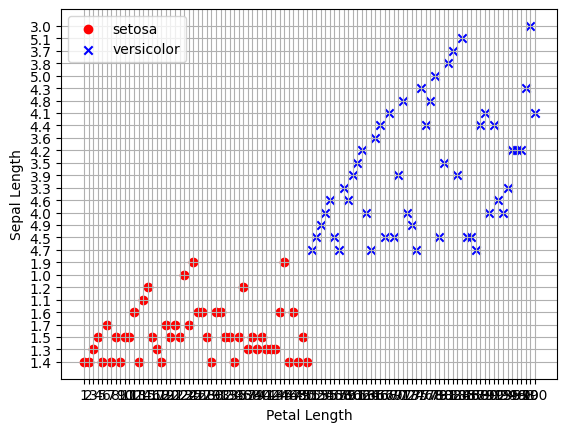

In [136]:
df = pd.read_csv('/content/drive/MyDrive/ML/Iris.csv', header=None)
setosa = df[df[5] == 'Iris-setosa']
versicolor = df[df[5] == 'Iris-versicolor']
virginica = df[df[5] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [146]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [147]:
df = pd.read_csv('/content/drive/MyDrive/ML/Iris.csv')
y = df.iloc[0:100, 5].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [1, 3]].values # slice data latih

In [148]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

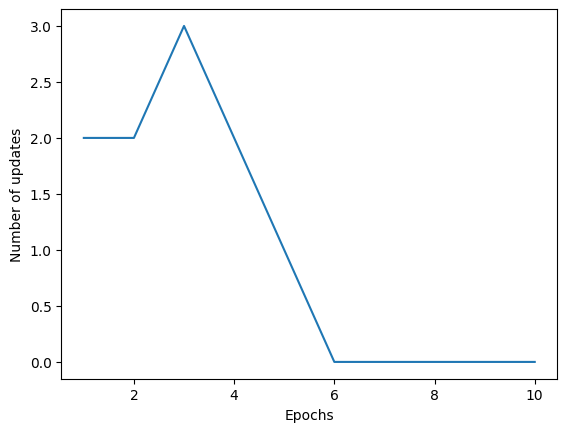

In [150]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

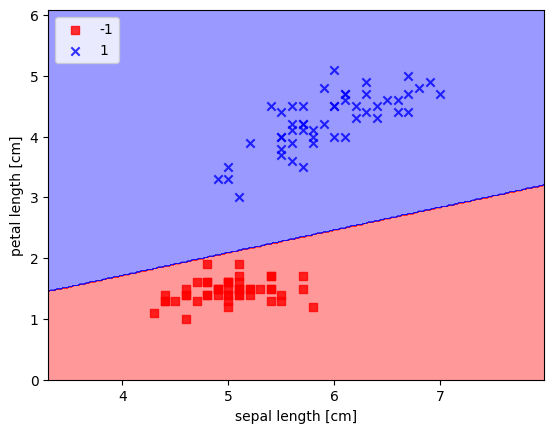

In [151]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

plot_decision_regions(X, y, ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### **Praktikum 2**

In [12]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

In [13]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

In [14]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



### **Praktikum 3**

In [15]:
from sklearn.neural_network import MLPClassifier

In [16]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

In [17]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

In [18]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


### **Praktikum 4**

In [42]:
!pip install tensorflow

In [71]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [72]:
dataset = pd.read_csv('/content/drive/MyDrive/ML/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [73]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [78]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7565 - loss: 0.6201
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7905 - loss: 0.5031
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7973 - loss: 0.4678
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7984 - loss: 0.4456
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7995 - loss: 0.4303
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7972 - loss: 0.4273
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7966 - loss: 0.4178
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7930 - loss: 0.4207
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8122 - loss: 0.4080
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8212 - loss: 0.3994
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8314 - loss: 0.3794
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [79]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[False]]


In [80]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1522   73]
 [ 206  199]]


0.8605

### **Tugas**

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow
import keras

from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')
#cuda 12.1 not recognized by tf :(
%matplotlib inline


In [153]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

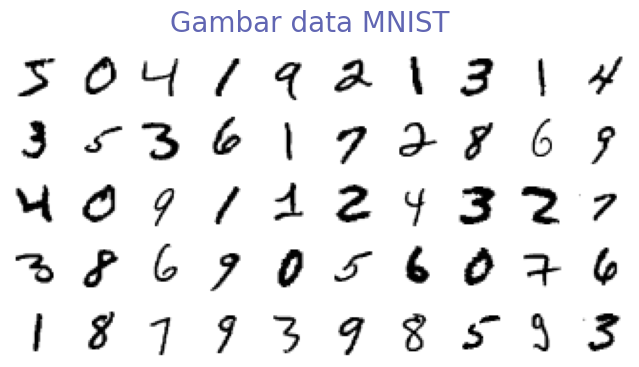

In [154]:
# menampilkan data inputan (hidden input)

fig, ax = plt.subplots(nrows = 5, ncols = 10, figsize=(8,4), subplot_kw={'xticks': [], 'yticks': []})
for row in range(0,5):
    for col in range(0,10):
        myid = (10*row) + col # (ncols*rows) + cols

        ax[row,col].imshow( x_train[myid], cmap=plt.cm.binary ) # W,H,C
        ax[row,col].axis('off')

plt.suptitle("Gambar data MNIST", size=20, color="#6166B3")

plt.show()

In [155]:
print("bentuk data: ",x_train.shape)
print("nilai max data: ",x_train[0].max())

bentuk data:  (60000, 28, 28)
nilai max data:  255


In [156]:
# ubah bentuk data dan skala pixel menjadi (n,w*h)
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255
# sama juga untuk x_test
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32') / 255

print("bentuk data setelah: ",x_train.shape)
print("nilai max data setelah: ",x_train[0].max())

bentuk data setelah:  (60000, 784)
nilai max data setelah:  1.0


In [157]:
# ubah bentuk label menjadi kategorical untuk digunakan tensorflow nantinya
y_train = tensorflow.keras.utils.to_categorical(y_train , num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test , num_classes=10)

<Sequential name=sequential_8, built=True>


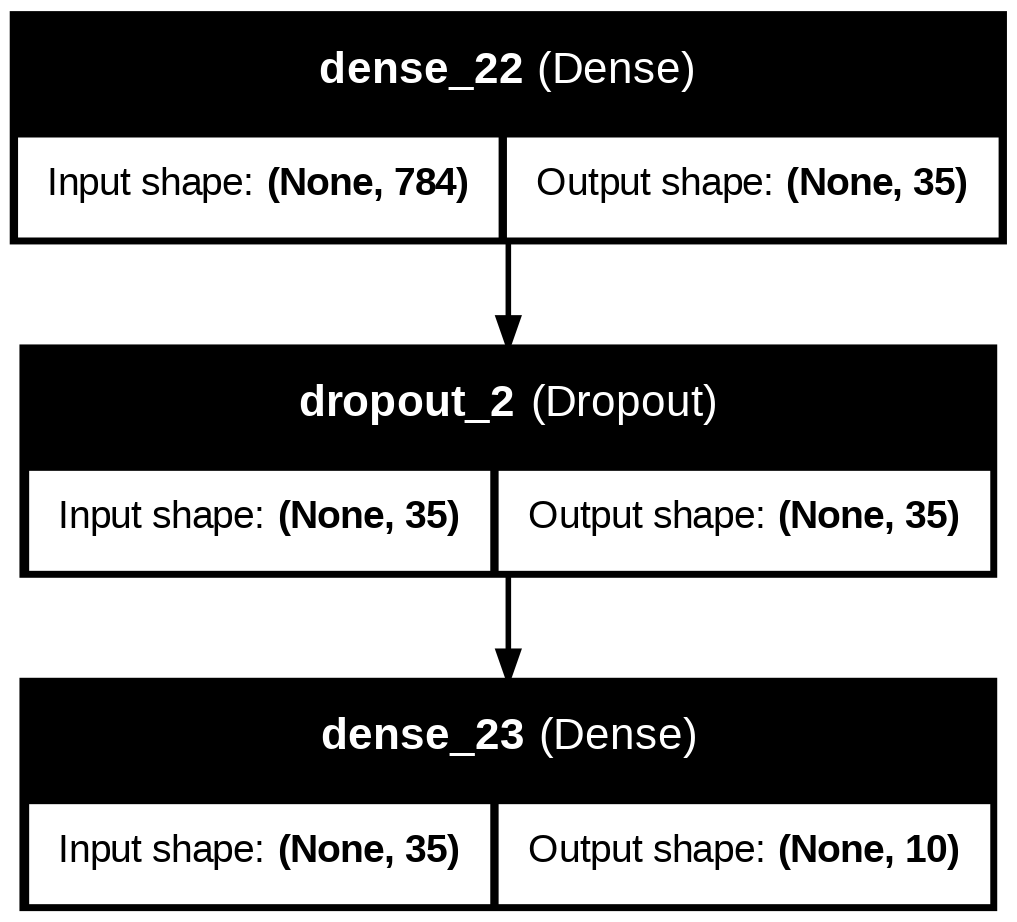

In [158]:
# pembuatan hidden layer
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Input,Add,MaxPool2D,Flatten,AveragePooling2D,Dense,BatchNormalization,ZeroPadding2D,Activation,Concatenate,UpSampling2D
from tensorflow.keras.models import Model

nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(10, activation='softmax'))
print(nn_model)
plot_model(nn_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [159]:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [160]:
history = nn_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7648 - loss: 0.7634
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9057 - loss: 0.3228
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9188 - loss: 0.2769
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9235 - loss: 0.2469
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9271 - loss: 0.2361
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9326 - loss: 0.2196
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9331 - loss: 0.2163
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9353 - loss: 0.2092
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9358 - loss: 0.2008
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9391 - loss: 0.1981
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9405 - loss: 0.1900
Epoch 12/100
1875/1

Text(0, 0.5, 'Acc')

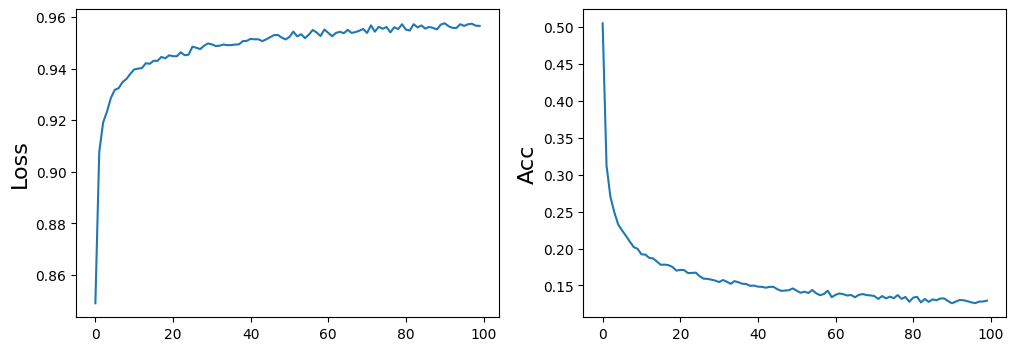

In [161]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].plot(history.history['accuracy'])
ax[0].set_ylabel('Loss', fontsize=16)


ax[1].plot(history.history['loss'])
ax[1].set_ylabel('Acc', fontsize=16)

In [162]:
y_prob = nn_model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.9617

In [163]:
from sklearn.metrics import confusion_matrix  # for evaluating results
confusion_array = confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion_array

array([[ 966,    0,    2,    0,    2,    3,    2,    4,    1,    0],
       [   0, 1117,    3,    1,    0,    2,    3,    2,    7,    0],
       [   4,    1,  999,    4,    4,    0,    3,   11,    6,    0],
       [   0,    2,   10,  974,    1,   13,    0,    5,    4,    1],
       [   1,    0,    4,    0,  930,    0,   15,    4,    3,   25],
       [   4,    0,    1,   20,    2,  844,    7,    2,    5,    7],
       [  12,    3,    3,    0,    4,    7,  924,    0,    5,    0],
       [   1,    9,   12,   12,    3,    1,    0,  981,    2,    7],
       [   8,    3,    7,    6,    6,    7,    6,   10,  919,    2],
       [   3,    6,    0,   10,   10,    6,    0,    6,    5,  963]])

<Axes: >

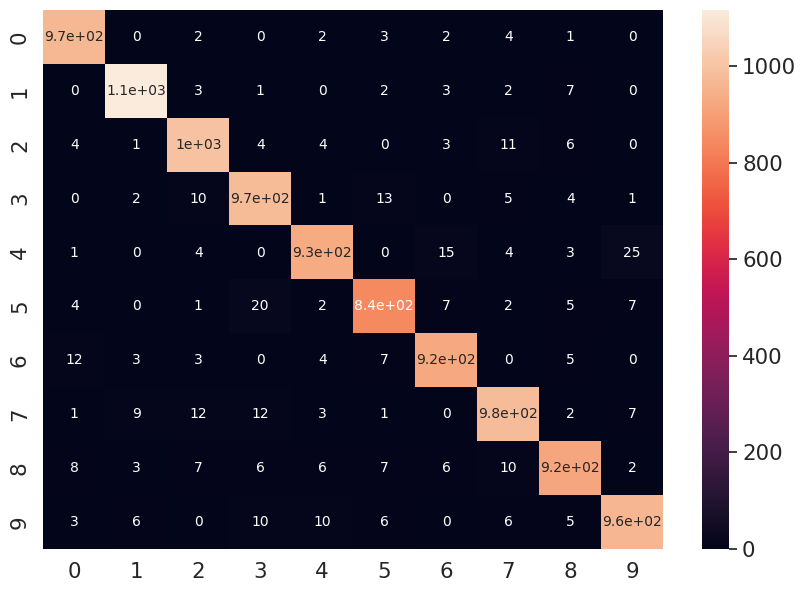

In [164]:
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(confusion_array, range(10), range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size

### **menggunakan model lain**

In [165]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# ubah bentuk data dan skala pixel menjadi (n,w*h)
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255
# sama juga untuk x_test
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32') / 255

print("bentuk data setelah: ",x_train.shape)
print("nilai max data setelah: ",x_train[0].max())

bentuk data setelah:  (60000, 784)
nilai max data setelah:  1.0


In [166]:
# ubah bentuk data dan skala pixel menjadi (n,w*h)
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255
# sama juga untuk x_test
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32') / 255

print("bentuk data setelah: ",x_train.shape)
print("nilai max data setelah: ",x_train[0].max())

bentuk data setelah:  (60000, 784)
nilai max data setelah:  0.003921569


In [167]:
# ubah bentuk label menjadi kategorical untuk digunakan tensorflow nantinya
y_train = tensorflow.keras.utils.to_categorical(y_train , num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test , num_classes=10)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 35)                  │          27,475 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 35)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 21)                  │             756 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │             220 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,451 (111.14 KB)

 Trainable params: 28,451 (111.14 KB)

 Non-trainable params: 0 (0.00 B)

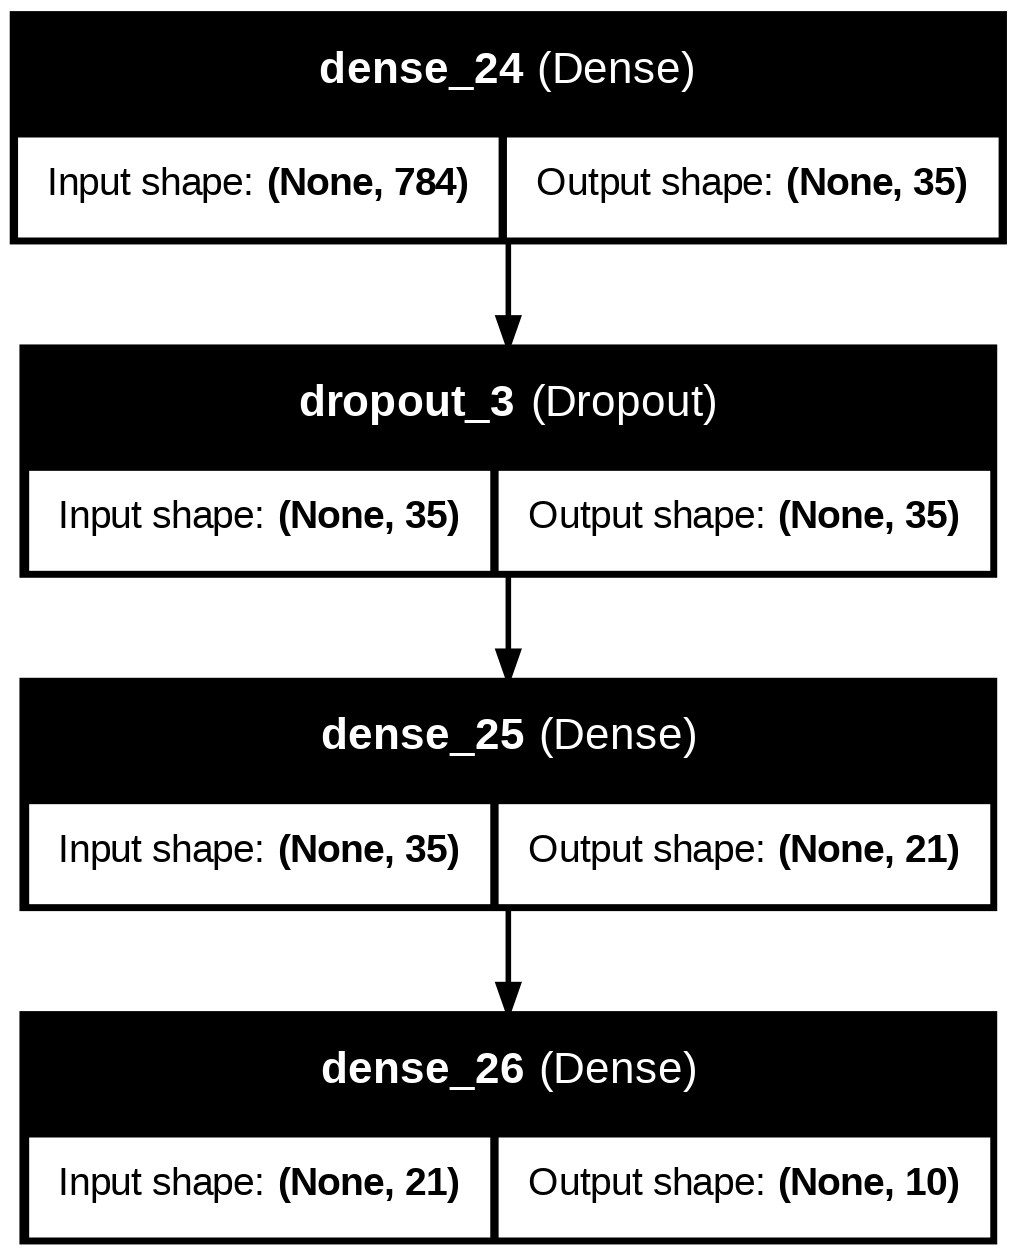

In [168]:
nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(21, activation='relu'))
nn_model.add(Dense(10, activation='softmax'))

nn_model.summary()

plot_model(nn_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [169]:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [170]:
history = nn_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4256 - loss: 1.7986
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7166 - loss: 0.8391
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7822 - loss: 0.6733
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8145 - loss: 0.5939
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8276 - loss: 0.5493
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8358 - loss: 0.5302
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8427 - loss: 0.5114
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8485 - loss: 0.4938
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8528 - loss: 0.4778
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8550 - loss: 0.4587
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8623 - loss: 0.4492
Epoch 12/100
1875/1

Text(0, 0.5, 'Acc')

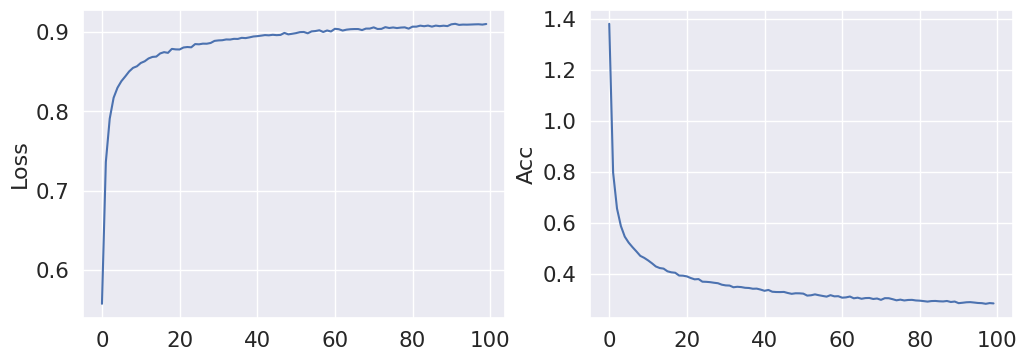

In [171]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].plot(history.history['accuracy'])
ax[0].set_ylabel('Loss', fontsize=16)


ax[1].plot(history.history['loss'])
ax[1].set_ylabel('Acc', fontsize=16)

In [172]:
y_prob = nn_model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy_score(y_test,y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


0.9484

In [173]:
confusion_array = confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion_array

array([[ 963,    0,    3,    1,    1,    2,    7,    2,    1,    0],
       [   0, 1119,    5,    0,    0,    1,    4,    1,    5,    0],
       [  11,    6,  973,    4,    5,    1,   13,    5,   13,    1],
       [   2,    1,   13,  941,    1,   29,    0,    9,    9,    5],
       [   3,    2,    2,    0,  951,    0,   10,    2,    3,    9],
       [   8,    0,    1,    9,    4,  832,   13,    6,   14,    5],
       [   9,    2,    2,    0,    5,    4,  934,    0,    2,    0],
       [   4,   13,   17,    5,   11,    0,    0,  966,    0,   12],
       [  11,    9,    9,    4,    8,   13,   14,   10,  891,    5],
       [   4,    9,    0,    7,   42,   17,    0,   13,    3,  914]])

<Axes: >

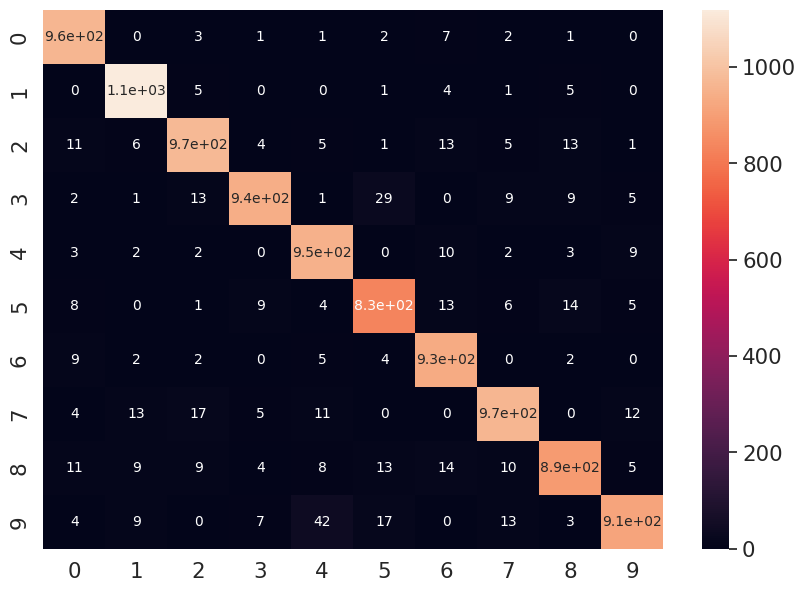

In [174]:
df_cm = pd.DataFrame(confusion_array, range(10), range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size